<a href="https://colab.research.google.com/github/aksha1234/Assignment_for_traffic/blob/main/code_05_XX_Spam_Classification_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 5.1. Setup

Install required text processing libraries for the example

In [1]:
!pip install nltk

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [14]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
lemmatizer=WordNetLemmatizer()

### 5.2. Creating Text Representations

Text data needs to be converted to numeric representations before they can be used to train deep learning models. The Spam classification feature data is converted to TF-IDF vectors and the target variable is converted to one-hot encoding.

In [4]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale



In [5]:
#Load Spam Data and review content
spam_data = pd.read_csv("Spam-Classification.csv")

In [6]:
spam_data

,CLASS,SMS
0,ham,"said kiss, kiss, i can't do the sound effects..."
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,spam,**FREE MESSAGE**Thanks for using the Auction S...
...,...,...
1495,ham,"Yup, no need. I'll jus wait 4 e rain 2 stop."
1496,ham,Yup... From what i remb... I think should be c...
1497,ham,Yup... How Ã¼ noe leh...
1498,ham,Yup... Ok i go home look at the timings then i...


In [7]:


print("\nLoaded Data :\n------------------------------------")
print(spam_data.head())

#Separate feature and target data
spam_classes_raw = spam_data["CLASS"]
spam_messages = spam_data["SMS"]


Loaded Data :
------------------------------------
  CLASS                                                SMS
0   ham   said kiss, kiss, i can't do the sound effects...
1   ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2  spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3  spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4  spam  **FREE MESSAGE**Thanks for using the Auction S...


In [8]:
import tensorflow as tf

In [9]:
#Custom tokenizer to remove stopwords and use lemmatization
def customtokenize(str):
    #Split string as tokens
    tokens=nltk.word_tokenize(str)
    #Filter for stopwords
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    #Perform lemmatization
    lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]
    return lemmatized

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
#Build a TF-IDF Vectorizer model
vectorizer = TfidfVectorizer(tokenizer=customtokenize)

In [15]:
#Transform feature input to TF-IDF
tfidf=vectorizer.fit_transform(spam_messages)
tfidf

<1500x4640 sparse matrix of type '<class 'numpy.float64'>'
	with 21166 stored elements in Compressed Sparse Row format>

In [16]:
#Convert TF-IDF to numpy array
tfidf_array = tfidf.toarray()

In [17]:
#Build a label encoder for target variable to convert strings to numeric values.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(
                                spam_classes_raw)

In [18]:
#Convert target to one-hot encoding vector
spam_classes = tf.keras.utils.to_categorical(spam_classes,2)

In [19]:
print("TF-IDF Matrix Shape : ", tfidf.shape)
print("One-hot Encoding Shape : ", spam_classes.shape)

TF-IDF Matrix Shape :  (1500, 4640)
One-hot Encoding Shape :  (1500, 2)


In [20]:
X_train,X_test,Y_train,Y_test = train_test_split( tfidf_array, spam_classes, test_size=0.10)

### 5.3. Building and Evaluating the Model

In [21]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

In [22]:
#Setup Hyper Parameters for building the model
NB_CLASSES=2
N_HIDDEN=32

model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(X_train.shape[1],),
                              name='Hidden-Layer-1',
                              activation='relu'))

model.add(keras.layers.Dense(N_HIDDEN,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 32)                148512    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 32)                1056      
                                                                 
 Output-Layer (Dense)        (None, 2)                 66        
                                                                 
Total params: 149,634
Trainable params: 149,634
Non-trainable params: 0
_________________________________________________________________



Training Progress:
------------------------------------
Epoch 1/10
5/5 [==============================] - 1s 64ms/step - loss: 0.6874 - accuracy: 0.6778 - val_loss: 0.6703 - val_accuracy: 0.7741
Epoch 2/10
5/5 [==============================] - 0s 17ms/step - loss: 0.6480 - accuracy: 0.8954 - val_loss: 0.6256 - val_accuracy: 0.9000
Epoch 3/10
5/5 [==============================] - 0s 16ms/step - loss: 0.5878 - accuracy: 0.9704 - val_loss: 0.5775 - val_accuracy: 0.9074
Epoch 4/10
5/5 [==============================] - 0s 16ms/step - loss: 0.5246 - accuracy: 0.9769 - val_loss: 0.5270 - val_accuracy: 0.9259
Epoch 5/10
5/5 [==============================] - 0s 18ms/step - loss: 0.4619 - accuracy: 0.9843 - val_loss: 0.4798 - val_accuracy: 0.9333
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 0.4022 - accuracy: 0.9907 - val_loss: 0.4336 - val_accuracy: 0.9444
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: 0.3454 - accuracy: 0.9926 - val_loss: 

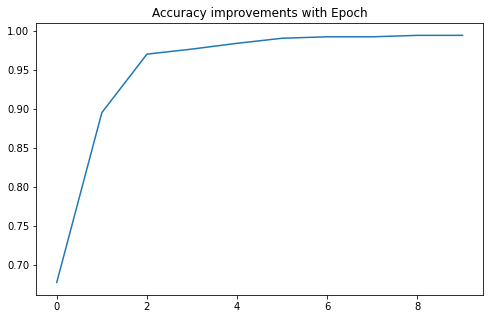


Evaluation against Test Dataset :
------------------------------------
5/5 [==============================] - 0s 4ms/step - loss: 0.2708 - accuracy: 0.9467


[0.27084410190582275, 0.9466666579246521]

In [23]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training
BATCH_SIZE=256
EPOCHS=10
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

### 5.4. Predicting for Text

In [24]:
#Predict for multiple samples using batch processing

#Convert input into IF-IDF vector using the same vectorizer model
predict_tfidf=vectorizer.transform(["FREE entry to a fun contest",
                                    "Yup I will come over"]).toarray()



In [25]:
print(predict_tfidf.shape)

#Predict using model
prediction=np.argmax( model.predict(predict_tfidf), axis=1 )
print("Prediction Output:" , prediction)

#Print prediction classes
print("Prediction Classes are ", label_encoder.inverse_transform(prediction))

(2, 4640)
Prediction Output: [1 0]
Prediction Classes are  ['spam' 'ham']
